In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
plt.rc('figure', figsize=(12,6))
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("non_linear_data_20k.csv")

In [3]:
data.head(2)

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Mentor Assigned,Python Score
0,2.022018,7.878963,2.957644,0,Ashish Soam Sir,38.355558
1,7.044159,0.342851,9.733393,0,Ashish Soam Sir,38.467549


In [4]:
data.shape

(20000, 6)

In [5]:
data.isnull().sum()

Study Hours               0
Mental Health Score       0
Emotional Health Score    0
Material to Study         0
Mentor Assigned           0
Python Score              0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.dtypes

Study Hours               float64
Mental Health Score       float64
Emotional Health Score    float64
Material to Study           int64
Mentor Assigned            object
Python Score              float64
dtype: object

In [8]:
for i in data:
    print("Unique Values:",data[i].unique(), end=",")
    print("Total Values:", data[i].nunique())
    print("\n")

Unique Values: [2.02201833 7.04415876 5.68276931 ... 1.20359401 6.30964582 7.98730716],Total Values: 20000


Unique Values: [7.87896313 0.34285136 9.06415133 ... 8.33542834 5.04946993 0.91529992],Total Values: 20000


Unique Values: [2.95764354 9.73339266 9.76977321 ... 7.28552369 4.48355742 3.56314928],Total Values: 20000


Unique Values: [0 1],Total Values: 2


Unique Values: ['Ashish Soam Sir' 'Salludin Sir' 'Swapnil Sir'],Total Values: 3


Unique Values: [38.35555756 38.46754943 56.92423053 ... 45.70488473 39.96957128
 29.08749368],Total Values: 20000




In [9]:
df=data # change the name of dataframe

In [10]:
df.head(2)

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Mentor Assigned,Python Score
0,2.022018,7.878963,2.957644,0,Ashish Soam Sir,38.355558
1,7.044159,0.342851,9.733393,0,Ashish Soam Sir,38.467549


In [11]:
#numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
#categorical_features = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
num_cols = df.select_dtypes(include=[np.number])#.columns  ##.tolist() 
cat_cols = df.select_dtypes(exclude=[np.number])#.columns ##.tolist()

In [13]:
num_cols.head(2) 

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Python Score
0,2.022018,7.878963,2.957644,0,38.355558
1,7.044159,0.342851,9.733393,0,38.467549


In [14]:
print(type(num_cols))

<class 'pandas.core.frame.DataFrame'>


In [15]:
cat_cols.head(2)

,Mentor Assigned
0,Ashish Soam Sir
1,Ashish Soam Sir


In [16]:
num_cols.corr().T

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Python Score
Study Hours,1.000000,-0.015623,0.000997,0.003730,0.415647
Mental Health Score,-0.015623,1.000000,0.001266,-0.002085,0.702921
Emotional Health Score,0.000997,0.001266,1.000000,0.008882,0.477718
Material to Study,0.003730,-0.002085,0.008882,1.000000,0.211401
Python Score,0.415647,0.702921,0.477718,0.211401,1.000000


<Axes: >

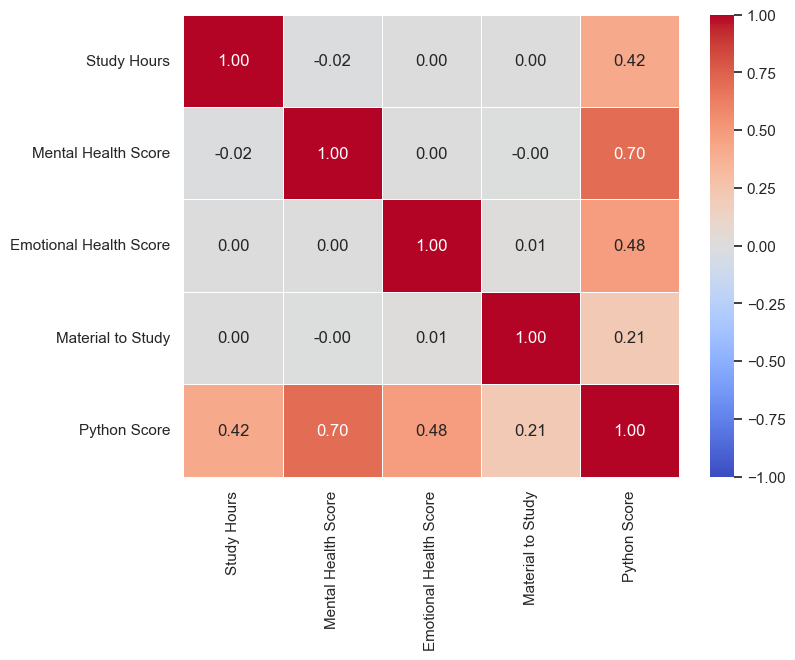

In [17]:
plt.figure(figsize=(8, 6))
corr=num_cols.corr()
sns.heatmap(data=corr,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

## Insights

- Study Hours moderately correlate with Python Score (0.42), suggesting more study time may improve scores.

- Mental Health Score strongly correlates with Python Score (0.70), indicating that mental health significantly impacts performance

- Emotional Health Score has a moderate positive correlation with Python Score (0.48), suggesting emotional well-being also plays a role.

- Material to Study shows weak correlation with Python Score (0.21), indicating it has less impact on performance.

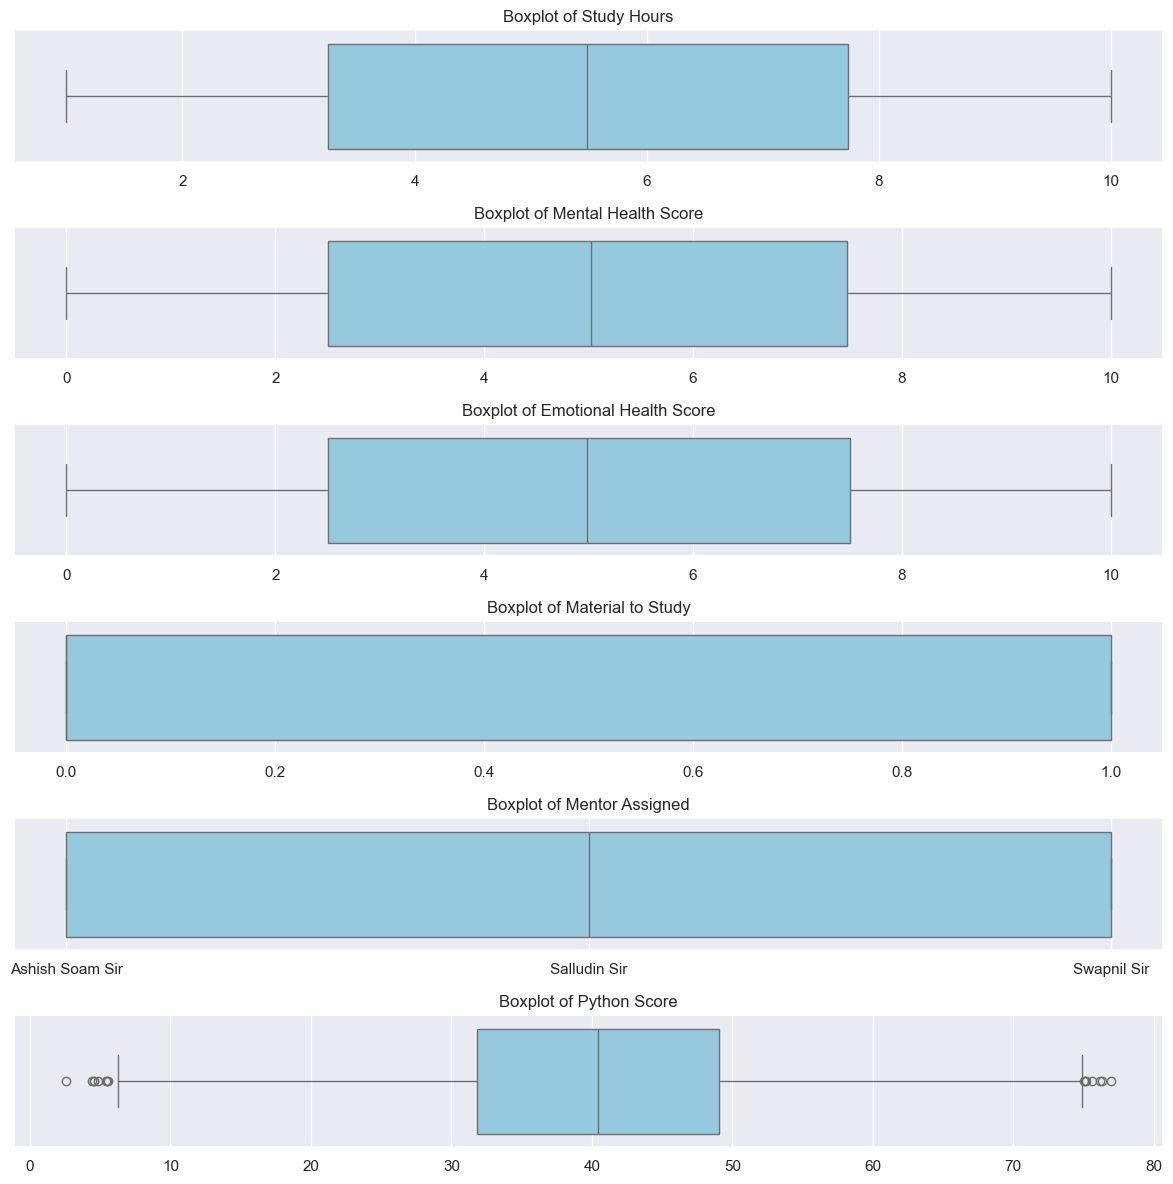

In [19]:
fig, axes = plt.subplots(len(data.columns), 1, figsize=(12, 2 * len(data.columns)))

# Loop through each feature and create a boxplot
for i, col in enumerate(data.columns):
    sns.boxplot(data=data, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for cleaner look

plt.tight_layout()
plt.show()

## Mutual Information
- For mixed feature types **(numerical and categorical)**, you can use Mutual Information to measure the 
dependency between features.
- It captures both linear and non-linear dependencies.

In [21]:
#from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df['Mentor Assigned'] = label_encoder.fit_transform(df['Mentor Assigned'])

df.head()

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Mentor Assigned,Python Score
0,2.022018,7.878963,2.957644,0,0,38.355558
1,7.044159,0.342851,9.733393,0,0,38.467549
2,5.682769,9.064151,9.769773,0,1,56.924231
3,7.950866,9.184517,2.546716,1,1,53.164165
4,5.681472,5.613904,1.672361,1,0,34.391398


## Mutual Information (MI) measures the dependence between features and the target variable, regardless of the type of data (numerical or categorical).

In [23]:
X = df.drop(columns='Python Score')
y = df['Python Score']
mi = mutual_info_regression(X, y)

# Display mutual information scores
mi_scores = pd.Series(mi, index=X.columns)
print("Mutual Information Scores:")
print(mi_scores)
print(type(mi_scores))

Mutual Information Scores:
Study Hours               0.099289
Mental Health Score       0.345559
Emotional Health Score    0.142861
Material to Study         0.019051
Mentor Assigned           0.000000
dtype: float64
<class 'pandas.core.series.Series'>


-  Mental Health Score has the highest MI (0.35), indicating a moderate relationship with the target.
-  Emotional Health Score also shows a moderate relationship (0.14), but weaker than Mental Health Score.
-  Study Hours (0.10) and Material to Study (0.02) have weak relationships with the target, suggesting limited impact.
-  Mentor Assigned (0.00) shows no relationship and should be removed.
    
### Action: Prioritize Mental Health Score and Emotional Health Score for model building. So we can  Consider removing Material to Study and Mentor Assigned. we can use VIF for this

## Heatmap after converting Categorical col: Mentor Assigned to Numerical col

<Axes: >

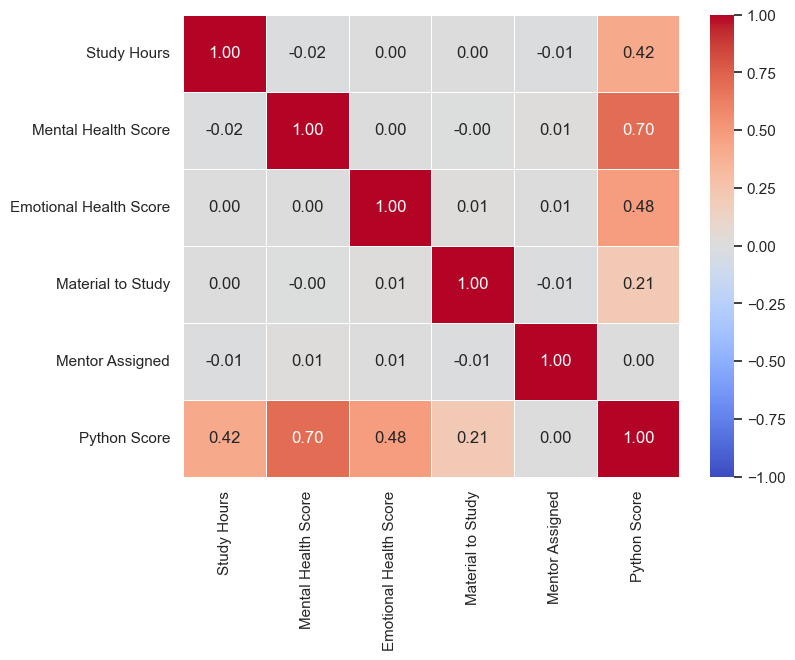

In [26]:
plt.figure(figsize=(8, 6))
corr=df.corr()
sns.heatmap(data=corr,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

### Heatmap Insights are same as MIF

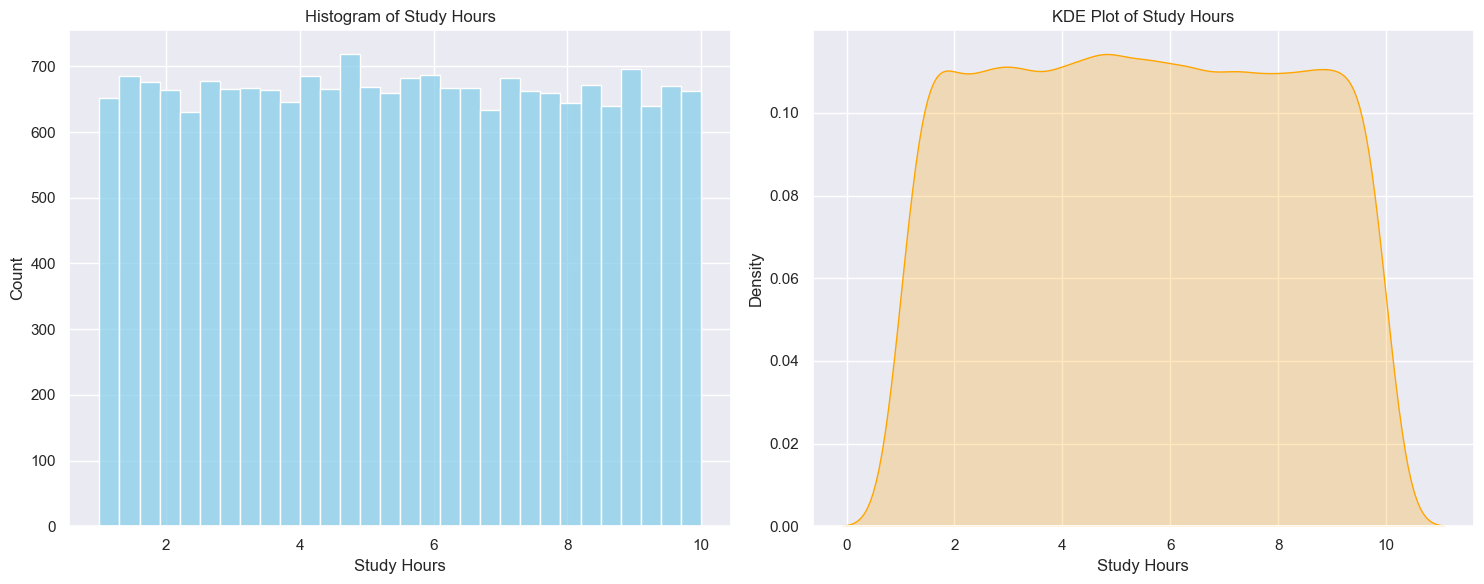

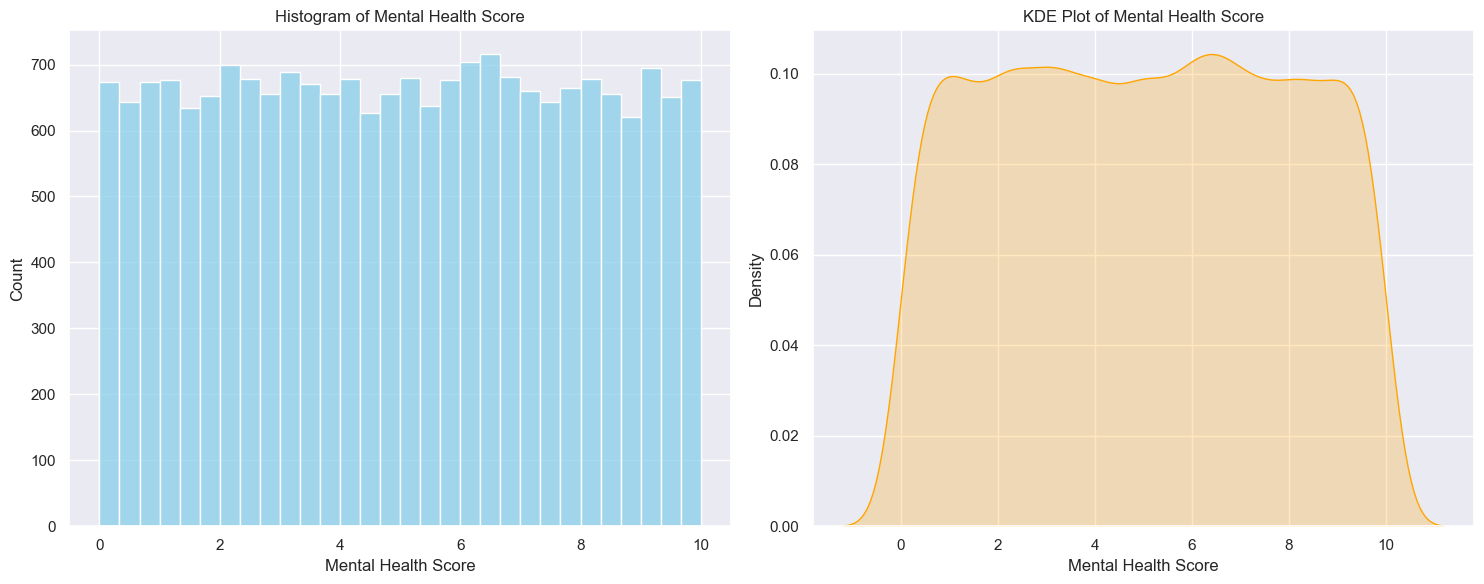

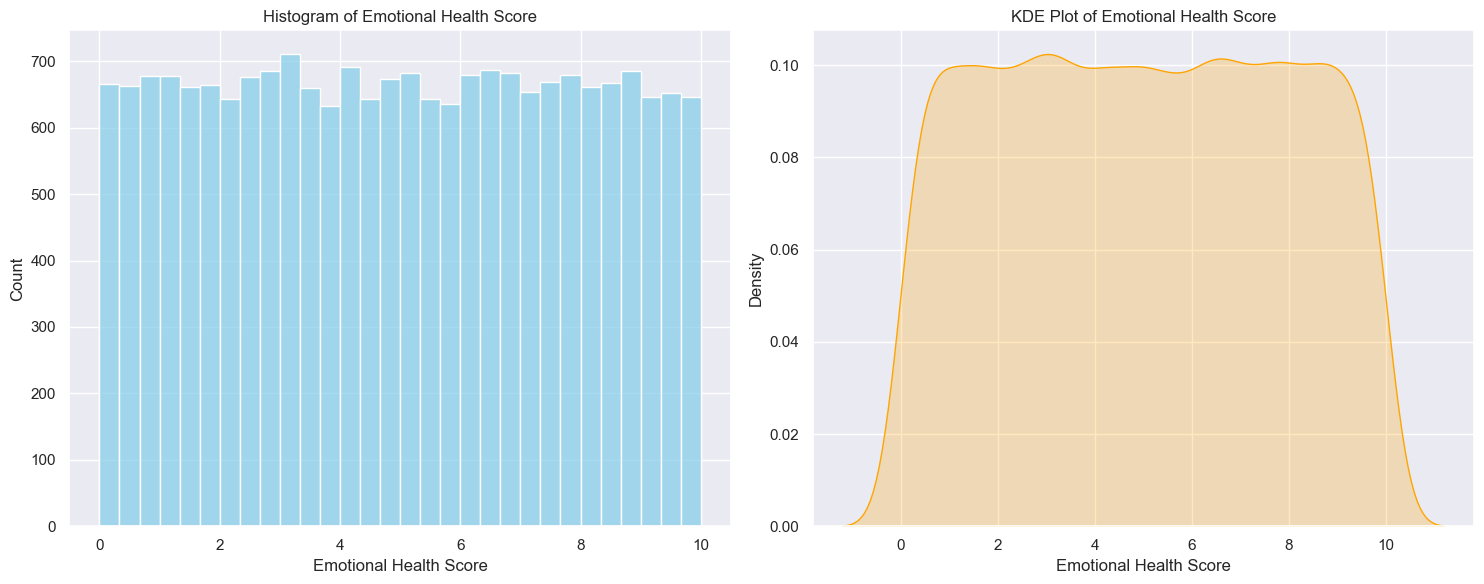

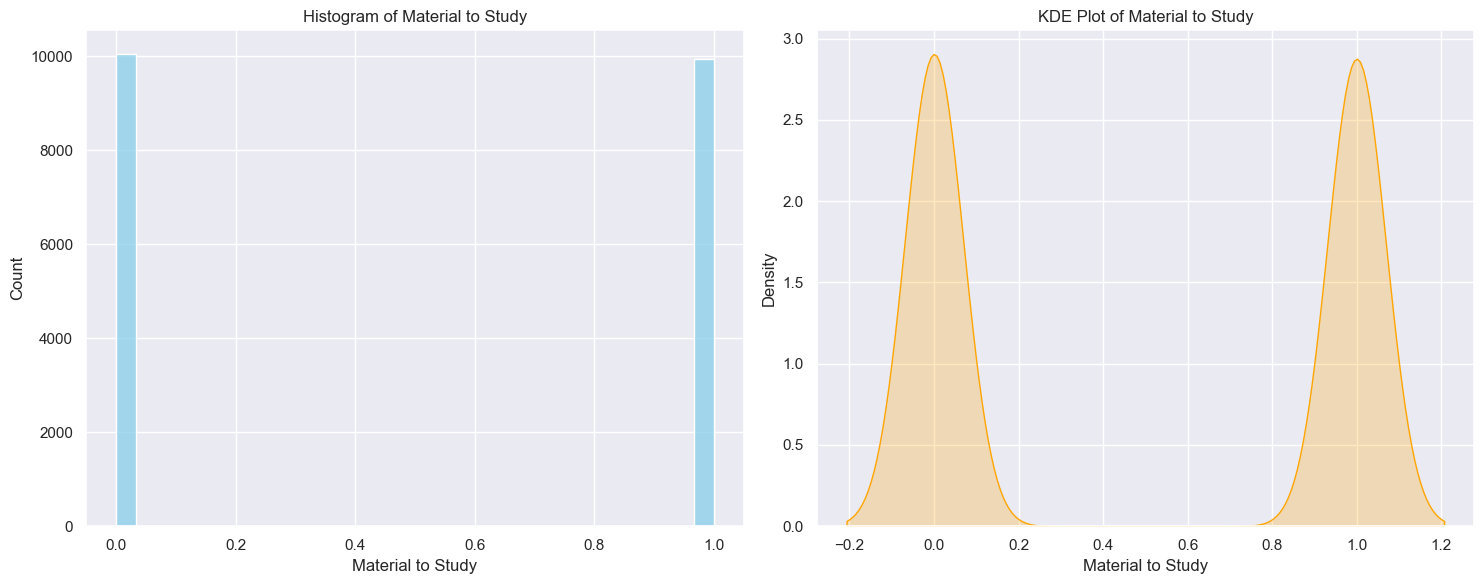

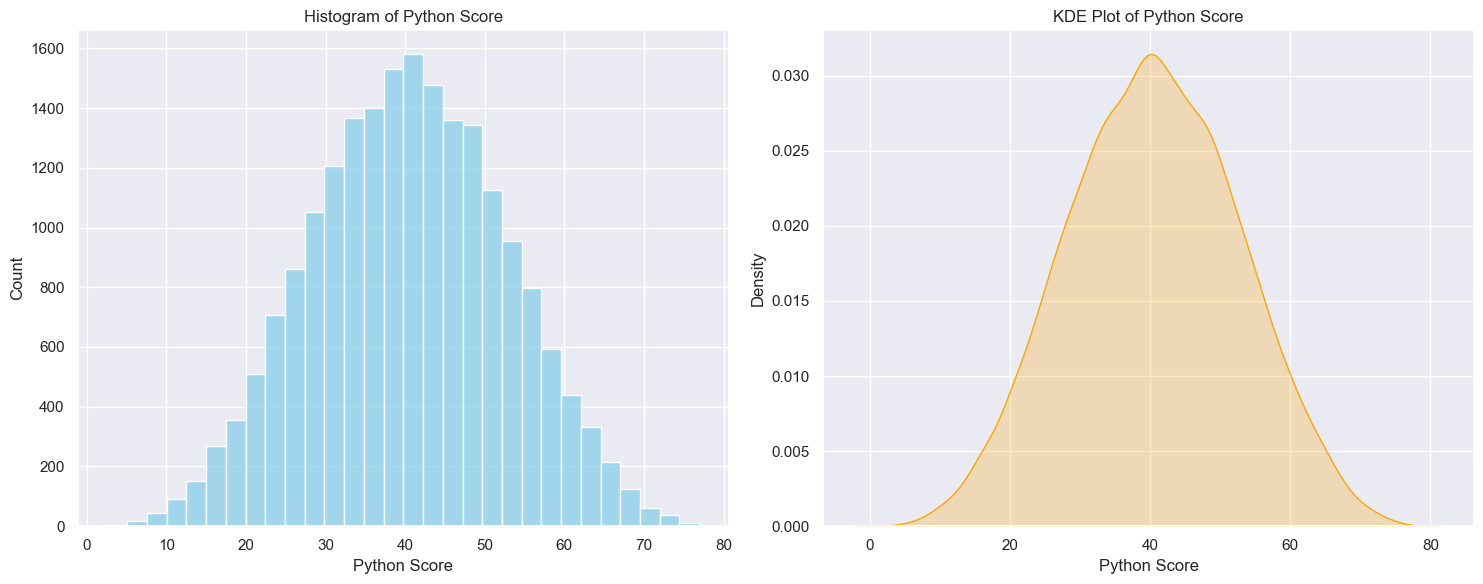

In [28]:
for col in num_cols:
    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot histogram on the first subplot
    sns.histplot(df[col], kde=False, ax=axes[0], bins=30, color='skyblue')
    axes[0].set_title(f"Histogram of {col}")
    
    # Plot KDE on the second subplot
    sns.kdeplot(df[col], shade=True, ax=axes[1], color='orange')
    axes[1].set_title(f"KDE Plot of {col}")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

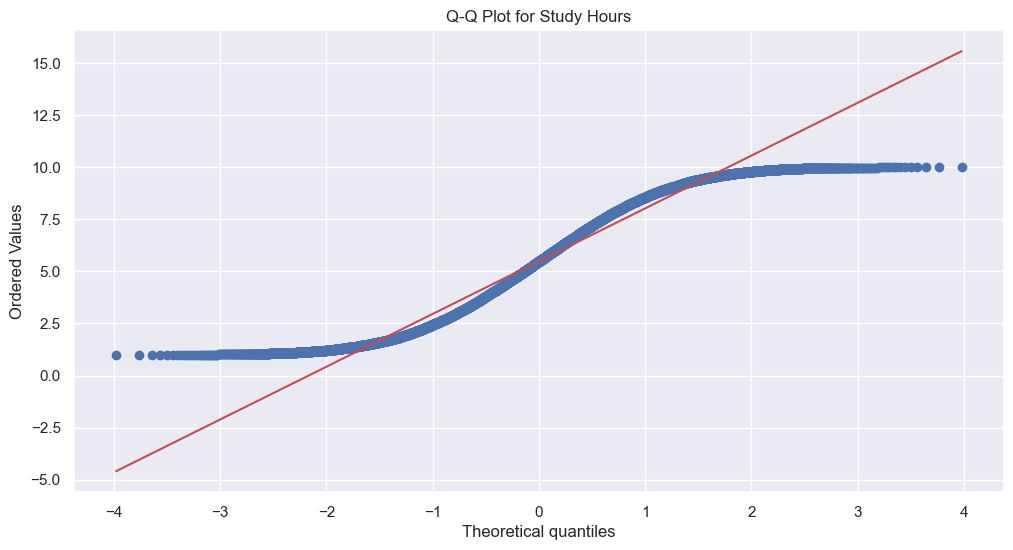

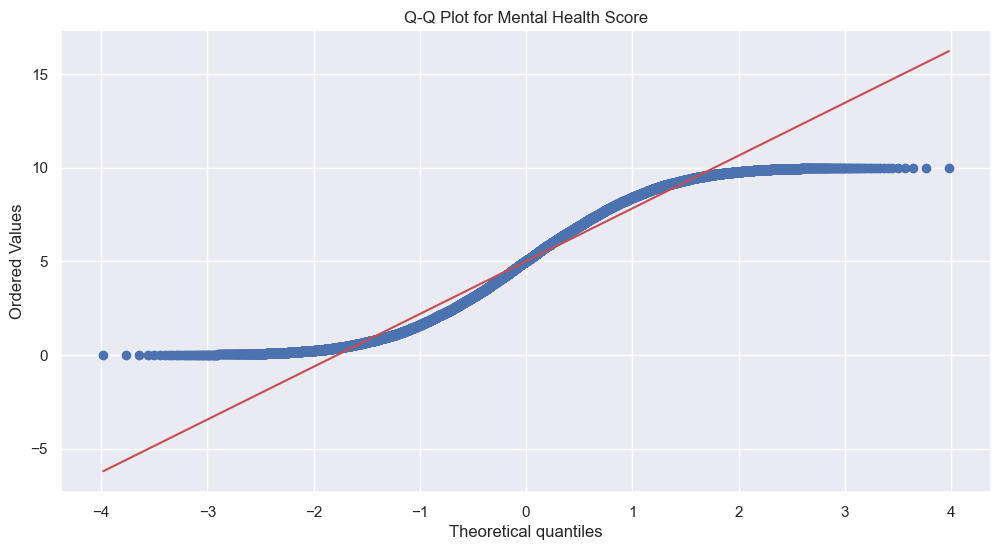

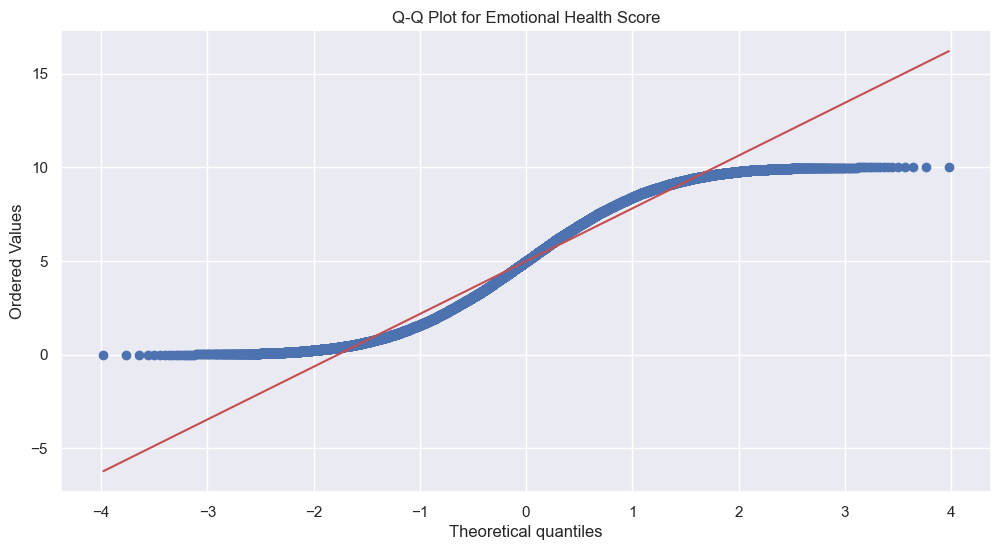

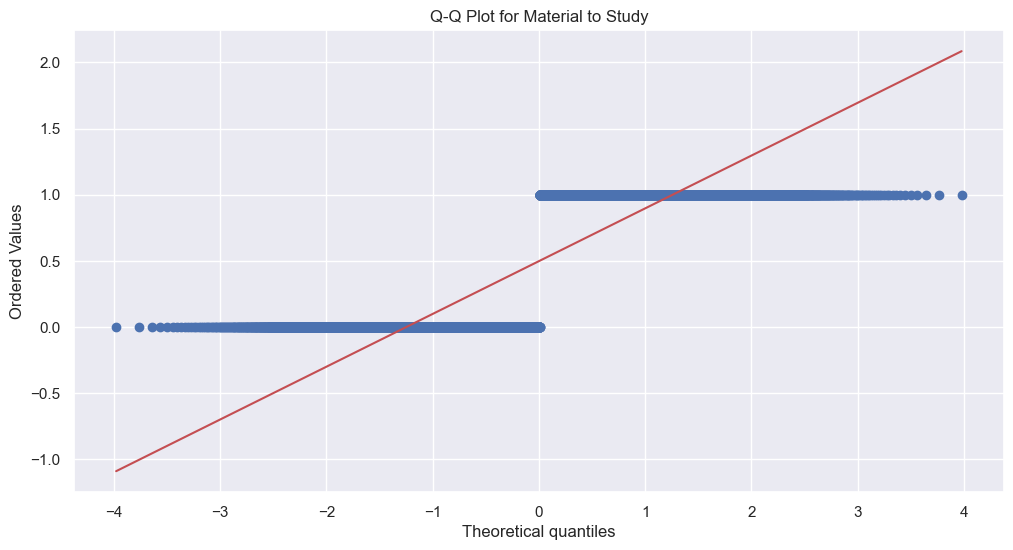

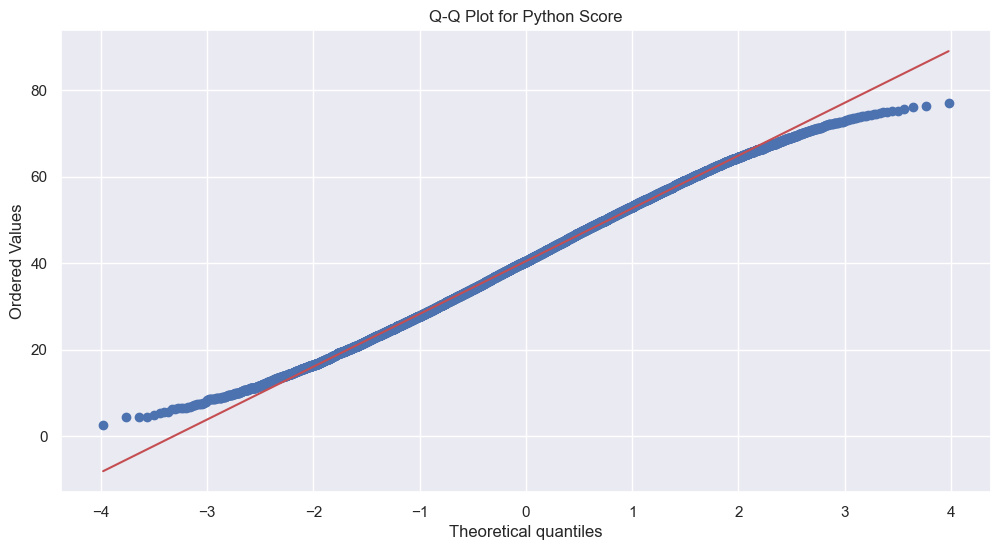

In [29]:
import scipy.stats as stats
for i in num_cols:
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {i}') 
    plt.show()

## Shapiro-Wilk Test for Normality (Numerical Data)

In [31]:
from scipy.stats import shapiro

# For numerical feature
for i in num_cols:
       stat, p_value = shapiro(df[i]) 
       print(f"{i}: Stat={stat}, p-value={p_value}")
       print(f"P-value: {p_value:.20f}")
    
       if p_value > .05:
           print("Data is normally distributed ")
       else:
            print("Data is not normally distributed ")
           

Study Hours: Stat=0.9555590748786926, p-value=0.0
P-value: 0.00000000000000000000
Data is not normally distributed 
Mental Health Score: Stat=0.9554064273834229, p-value=0.0
P-value: 0.00000000000000000000
Data is not normally distributed 
Emotional Health Score: Stat=0.9550690650939941, p-value=0.0
P-value: 0.00000000000000000000
Data is not normally distributed 
Material to Study: Stat=0.6366617679595947, p-value=0.0
P-value: 0.00000000000000000000
Data is not normally distributed 
Python Score: Stat=0.9978665113449097, p-value=4.863652595222352e-16
P-value: 0.00000000000000048637
Data is not normally distributed 


- Interpretation: If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning the data follows a normal distribution.

- all the features have p-values of 0.0 (or close to zero), which suggests that none of the features follow a normal distribution.

### Checking of Linearity before Splitting 

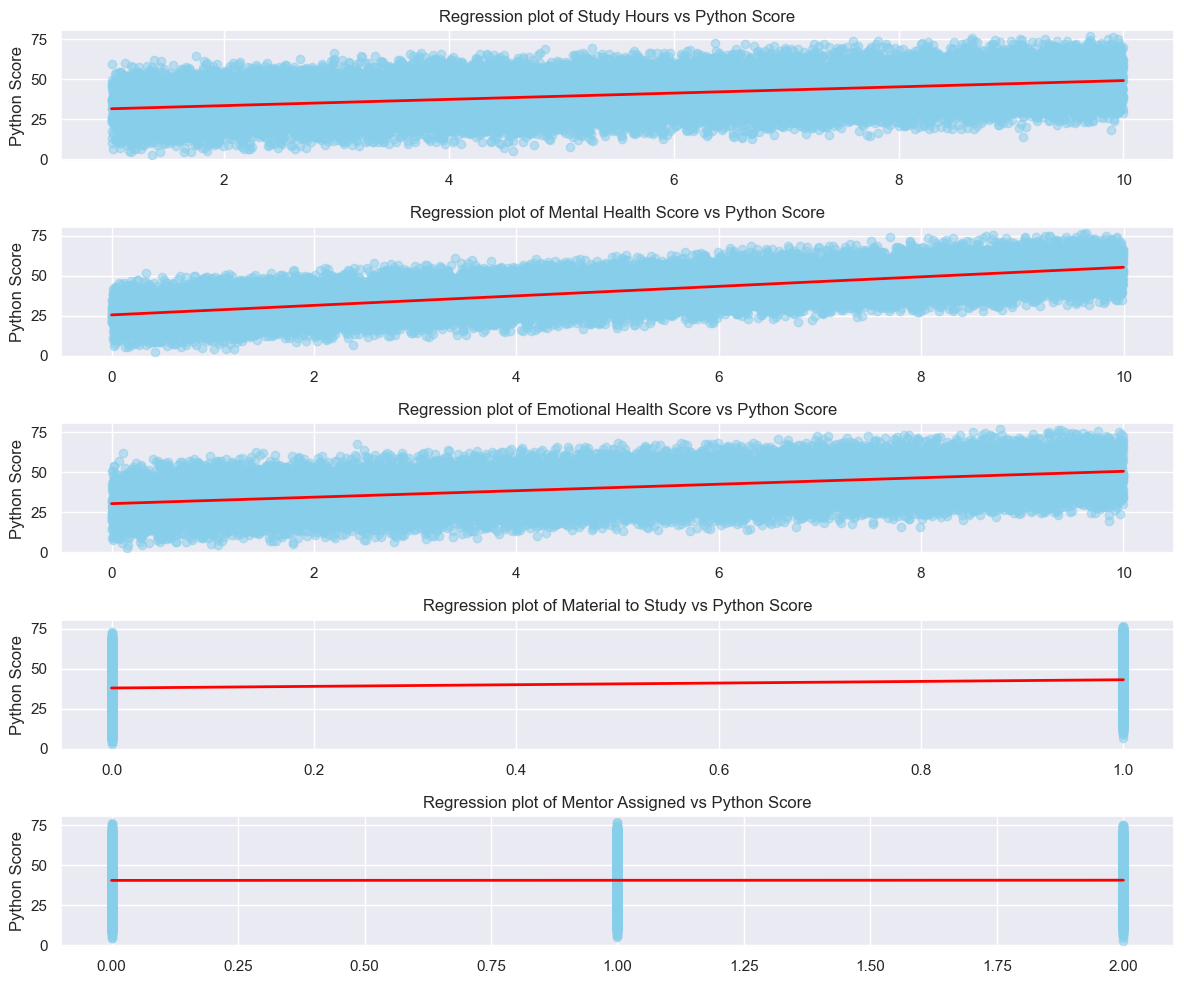

In [34]:
target_col = 'Python Score'
num_cols = df.select_dtypes(include=['number']).drop(columns=[target_col], errors='ignore').columns

fig, axes = plt.subplots(len(num_cols), 1, figsize=(12, 2 * len(num_cols)))

# Loop through each numerical feature and create a regression plot
for i, col in enumerate(num_cols):
    
    sns.regplot(
        
    data=df, x=col, y=target_col, ax=axes[i], 
    scatter_kws={'color': 'skyblue', 'alpha': 0.5},  # Scatter points color
    line_kws={'color': 'red', 'linewidth': 2}  # Regression line color
        
     )
    axes[i].set_title(f'Regression plot of {col} vs {target_col}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

## Note: For Linear Regression:

- Linear regression **does not require predictors (independent variables) to be normally distributed.**
However, it assumes a linear relationship between independent and dependent variables.
If the relationship is nonlinear, transformation may help linearize it.** 

- **Normality is required for residuals, not predictors.**

### Importing Sklearn Package

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import statsmodels.api as sm

### We are spliting the data first before checking assumptions to avoid data leakage

### Steps:

- Split the data (train-test split).
                
- assumptions on the training set:

1. Linearity (scatter plots, correlation).
2. Multicollinearity (VIF).
3. Homoscedasticity (residual plots).
4. Normality of residuals (Q-Q plot, histogram).
5. Apply necessary transformations if needed.

- Fit the linear regression model.
- assumptions again using residual analysis.
- Assumptions are checked before and after fitting the model to validate results

In [40]:
X= df.drop(columns=['Python Score'],axis=1)
y=df['Python Score']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 5)
(6000, 5)
(14000,)
(6000,)


- Assumptions should be **checked on the original scale of the data**

In [44]:
X_train.head()

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Mentor Assigned
11408,8.490032,3.151435,0.315166,0,1
3616,5.939855,7.788234,5.966094,0,2
9747,7.094717,9.163459,6.095586,1,2
6915,4.305499,0.941398,1.629943,0,1
4888,6.365284,7.568493,6.160395,0,2


In [45]:
X_train.head(1)

,Study Hours,Mental Health Score,Emotional Health Score,Material to Study,Mentor Assigned
11408,8.490032,3.151435,0.315166,0,1


In [46]:
y_train.head(1)

11408    29.422135
Name: Python Score, dtype: float64

## Check If Indexes Are Ordered Properly

In [48]:
print(X_train.index.is_monotonic_increasing)  # True if sorted
print(X_test.index.is_monotonic_increasing)

False
False


In [49]:
print(X_train.index[:5])  # Check first 10 indexes
print(X_test.index[:5])

Index([11408, 3616, 9747, 6915, 4888], dtype='int64')
Index([11456, 16528, 3253, 18614, 1544], dtype='int64')


In [50]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [51]:
print(X_train.index[:5]) 
print(X_test.index[:5])

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [52]:
print(list(X_train.index[:5]))  
print(list(X_test.index[:5]))

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [53]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


- sequential indexes starting from 0 in both the training and test set

### Linear Regression assumptions:

- Linearity: The relationship between the independent and dependent variables is linear.

- No Multicollinearity: Independent variables are not highly correlated with each other.

- Homoscedasticity: The variance of residuals (errors) is constant across all levels of the independent variable.

- Normality of Residuals: Residuals (errors) should follow a normal distribution.

- No Autocorrelation: Residuals are independent of each other.

### 1. To check the linearity assumption in regression models, there are different approaches
**Input and output there has to be linear relationhsip either positive or negative**

- Regplot: Quick visual check for linearity.
- Ramsey's RESET test: Statistical test for non-linearity.
- OLS: Residual plots after fitting the model help check for linearity in practice.

**These methods help confirm whether a linear model is appropriate or if non-linear relationships need to be considered.**

In [57]:
df.columns

Index(['Study Hours', 'Mental Health Score', 'Emotional Health Score',
       'Material to Study', 'Mentor Assigned', 'Python Score'],
      dtype='object')

- Linearity Matters for Regression → If the relationship is linear normality is not a strict requirement for making predictions.

<function matplotlib.pyplot.show(close=None, block=None)>

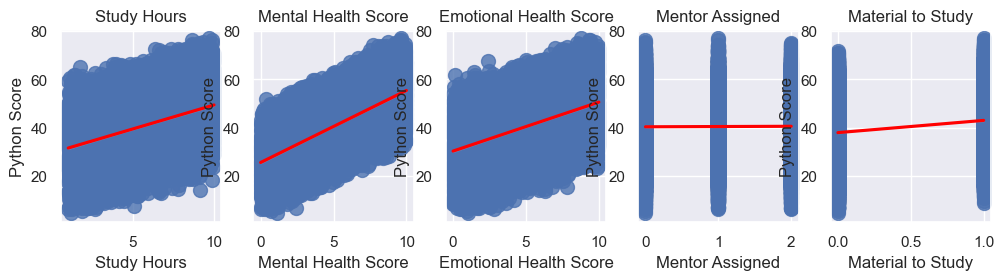

In [59]:
features = ['Study Hours', 'Mental Health Score', 'Emotional Health Score', 'Mentor Assigned', 'Material to Study']
fig , axes = plt.subplots(ncols=5, figsize=(12, 2.5))
#fig , axes = plt.subplots(5,1, figsize=(12, 2.5)) # visulaizaton not proper
for ax, feature in zip(axes, features):
    sns.regplot(x=X_train[feature], y=y_train, ax=ax, scatter_kws={'s': 100}, line_kws={'color': 'red'})
    ax.set_title(feature)
    
plt.show
# regplot() is a function from the Seaborn library, not a method available to Matplotlib's axes (ax).

## Ramsey RESET Test (to confirm model choice)

In [61]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

# Add constant for intercept
X = sm.add_constant(X)

# Fit an OLS (Ordinary Least Squares) linear model
model = sm.OLS(y, X).fit()

# Apply Ramsey RESET Test
reset_test = linear_reset(model, power=2)  # power=2 checks quadratic terms
print(reset_test)


<Wald test (chi2): statistic=0.43336859342732953, p-value=0.5103406431553754, df_denom=1>


- p-value > 0.05 → No significant non-linearity, linear model is fine ✅
- p-value < 0.05 → Model misspecification detected, consider polynomial regression, feature transformations, or adding interaction terms ❌

### **TEST No-1  Linear Relationship Test passed: Go for Linear Regression ✅**
$ __________________________________________________________________________________________$ 


## 2. Checking Multicollinearity among Input Features

### Approaches:

**VIF, a correlation matrix, the condition number, or tolerance.**

 
- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated 
- VIF greater than 5 = variables are highly correlated,suggesting that the variable should be removed or combined with others.

**If multicollinearity is detected, you may need to adjust your model by removing or combining features, or using techniques like PCA or regularization**

### 2.1 Calculating VIF without and with adding Constant 

- VIF with intercept is the standard and most appropriate method for detecting multicollinearity.
- VIF without intercept may not account for the baseline in the relationship and is not typically used unless specifically justified by the model structure.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [67]:
vif1=pd.DataFrame({'VIF': vif}, index=X_train.columns[0:5]) # first 5 cols
vif1

,VIF
Study Hours,3.683224
Mental Health Score,3.128889
Emotional Health Score,3.174656
Material to Study,1.848795
Mentor Assigned,2.258653


In [68]:
print(type(vif1))

<class 'pandas.core.frame.DataFrame'>


In [69]:
from statsmodels.tools.tools import add_constant
X = add_constant(X_train)  # Add intercept term

# Compute VIF for each feature
vif2= pd.DataFrame()
vif2.index = X.columns
vif2['Vif_WI'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2

,Vif_WI
const,13.973410
Study Hours,1.000242
Mental Health Score,1.000362
Emotional Health Score,1.000138
Material to Study,1.000159
Mentor Assigned,1.000452


In [70]:
print(type(vif)) 
print(type(vif1)) 
print(type(vif2))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
# Check if indexes of two DataFrames are the same or different
indexes_are_equal = vif1.index.equals(vif2.index)

if indexes_are_equal:
    print("The indexes are the same.")
else:
    print("The indexes are different.")


The indexes are different.


In [72]:
# Comparison of both data frame without and with Intercept 
comparison_vif = pd.concat([vif1['VIF'],vif2['Vif_WI']], axis=1)
comparison_vif

,VIF,Vif_WI
Study Hours,3.683224,1.000242
Mental Health Score,3.128889,1.000362
Emotional Health Score,3.174656,1.000138
Material to Study,1.848795,1.000159
Mentor Assigned,2.258653,1.000452
const,NaN,13.973410


In [73]:
comparison_VIF = pd.DataFrame({
    'Without_intercept': vif1['VIF'],   
    'With_intercept': vif2['Vif_WI']
})
print(comparison_VIF)

                        Without_intercept  With_intercept
Emotional Health Score           3.174656        1.000138
Material to Study                1.848795        1.000159
Mental Health Score              3.128889        1.000362
Mentor Assigned                  2.258653        1.000452
Study Hours                      3.683224        1.000242
const                                 NaN       13.973410


- high VIF for the intercept does not indicate multicollinearity issues in the predictor variables. The intercept simply absorbs variance from all predictors.
**VIF measures how much a variable is explained by the other variables.**


- dont not eliminate features immediately after detecting multicollinearity

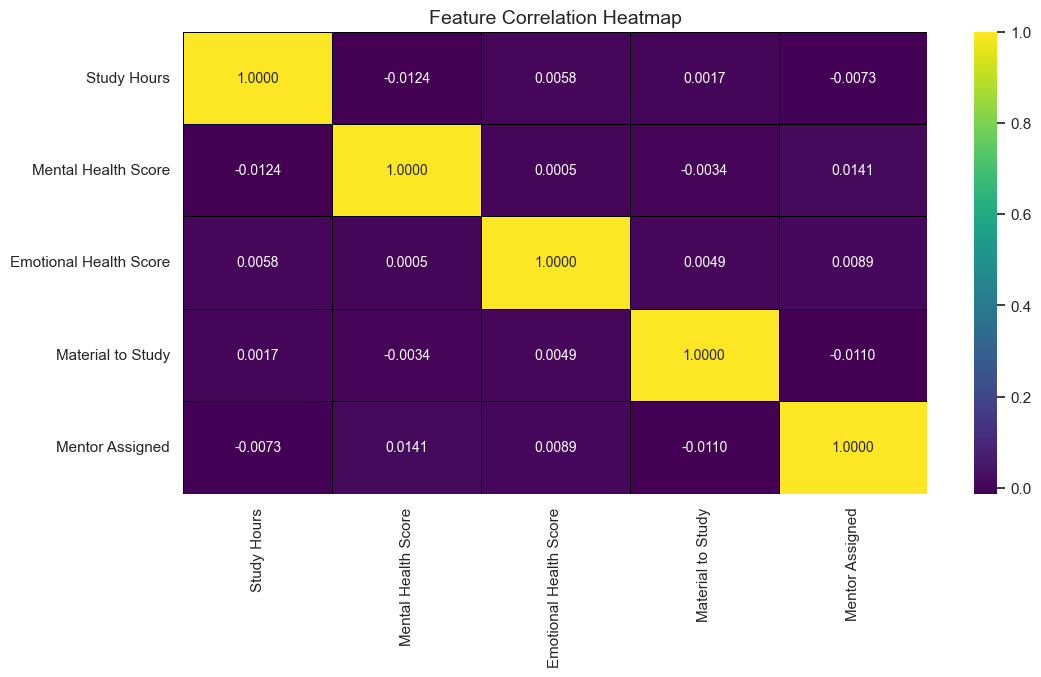

In [76]:
#sns.heatmap(X_train.iloc[:,0:5].corr(),annot=True)
#"coolwarm" – Balanced contrast"viridis" – Colorblind-friendly"crest" – Smooth blue gradient"mako" – Deep ocean colors
#"rocket" – Red gradient

#plt.figure(figsize=(8,6))  # Adjust figure size
sns.heatmap(X_train.iloc[:,0:5].corr(), 
            annot=True, 
            cmap="viridis",  # Change color map
            linewidths=0.5,  # Add spacing
            linecolor='black',  # Grid color
            fmt=".4f",  # Limit decimal places
            annot_kws={"size": 10})  # Control font size
plt.title("Feature Correlation Heatmap", fontsize=14)  # Add a title
plt.show()

In [77]:
import os
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\hp\JOLLY_WORKSPACE_12_FEB_2025\Python_Machine_Learning_Projects_Working\J_LINEAR_REGRESSION


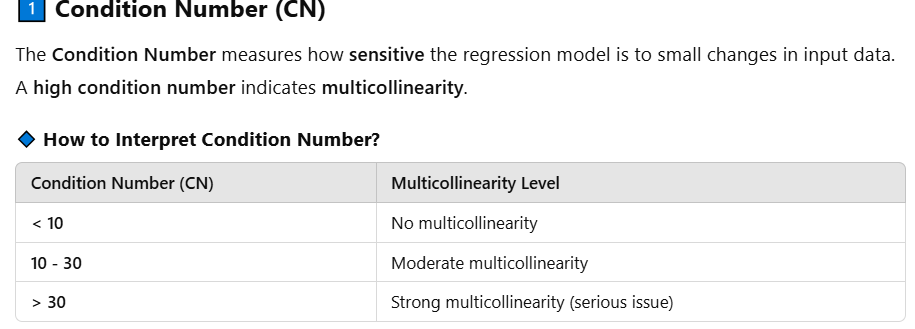

In [78]:
from IPython.display import Image
Image('condition_no.png')

### For a more accurate assessment of multicollinearity, calculate the condition number without the intercept.

In [80]:
X_matrix = X_train.values  # Convert DataFrame to NumPy array
condition_number = np.linalg.cond(X_matrix)  
print("Condition Number:", condition_number)

Condition Number: 18.242411051882495


### INSIGHTS : Moderate Multicolinearity

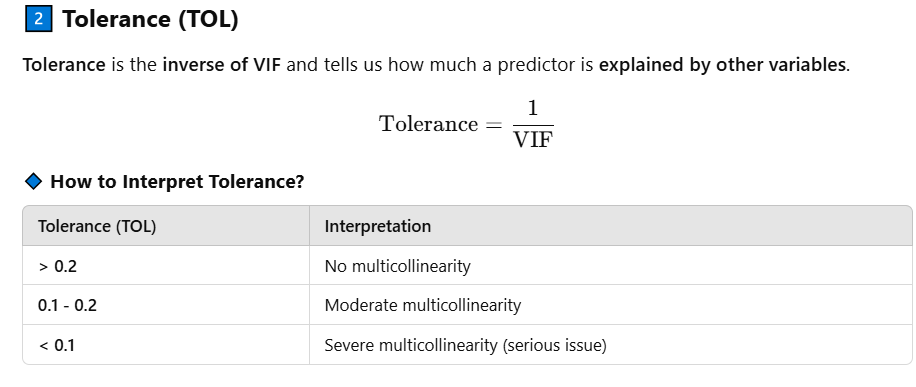

In [82]:
from IPython.display import Image
Image('tolerance.png')

### For accurate multicollinearity assessment, it's usually best to calculate tolerance without the intercept.

In [84]:
tolerance_values1 = [1 / variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
tolerance_df1 = pd.DataFrame({'Feature': X_train.columns, 'Tolerance': tolerance_values1})
print(tolerance_df1)

                  Feature  Tolerance
0             Study Hours   0.271501
1     Mental Health Score   0.319602
2  Emotional Health Score   0.314995
3       Material to Study   0.540893
4         Mentor Assigned   0.442742


### Insights: No Multicolinearity

### **TEST No-2 Multicolinearity Test: Go for Linear Regression ✅**
$ __________________________________________________________________________________________$ 


### 3. Normality of Residual
#### Steps and Different Approaches:
- Scale your features using Standard Scaling(even if your data is not normally distributed)
- Fit the model and predict: You need predictions first
- Calculate residuals: Residuals = actual values − predicted values
- Test normality: Use visual **(histogram, Q-Q plot) or statistical tests (Shapiro-Wilk, Anderson-Darling, etc.) to assess normality.**

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_train_scaled[:,:5] #5 columns
X_test_scaled[:,:5]

array([[-0.88702783, -0.95301535,  0.54518982,  1.00400803,  1.20911739],
       [ 0.24645265, -0.04420382, -1.47237778, -0.99600797, -1.23619044],
       [ 0.23859295,  0.43715968, -0.14790335,  1.00400803,  1.20911739],
       ...,
       [-0.40583872, -1.22571977, -0.46816956,  1.00400803, -1.23619044],
       [-0.03723157, -0.95859521, -1.29751083, -0.99600797,  1.20911739],
       [-0.81072529,  1.09409847,  0.38867885,  1.00400803, -1.23619044]])

## Note :
- Scaling the target variable y is often not necessary for most linear models
(e.g., Linear Regression), but it may be helpful for models that are sensitive to the magnitude of the 
output (e.g., neural networks).

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [92]:
# Residual
y_pred = lm.predict(X_test) # y_test already known
residuals = y_test - y_pred

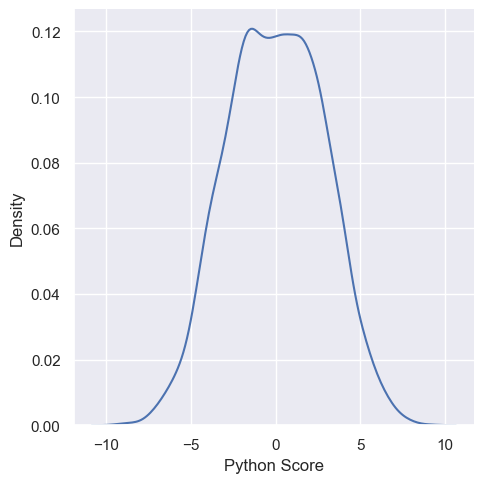

In [93]:
sns.displot(residuals,kind='kde')

((array([-3.68241411, -3.44989761, -3.32188596, ...,  3.32188596,
          3.44989761,  3.68241411]),
  array([-9.35554378, -8.85983074, -8.85036306, ...,  8.10346703,
          8.35240044,  9.13924507])),
 (2.8389018194978073, 0.004125340715694468, 0.9982342409498389))

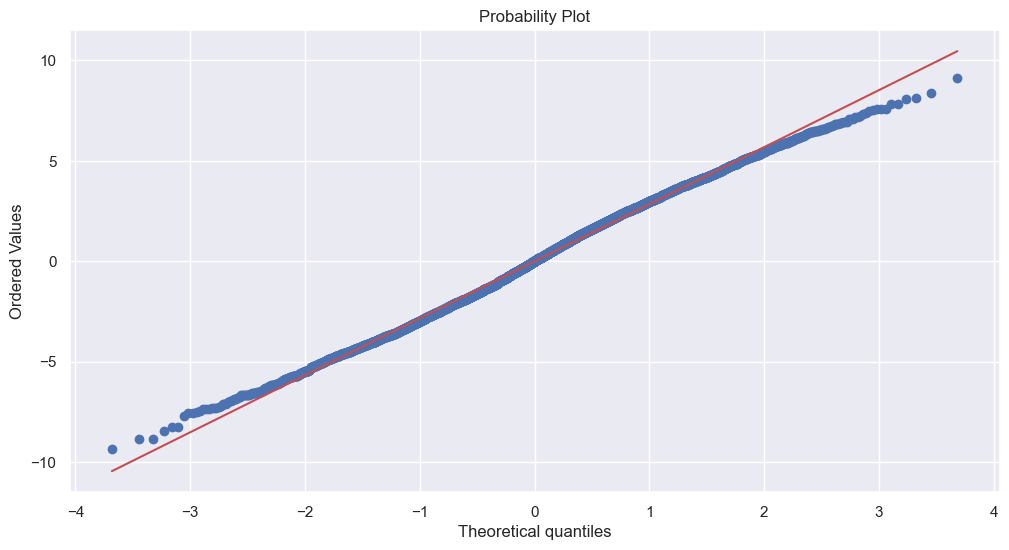

In [94]:
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)

- 2. Statistical Tests:

In [96]:
from scipy import stats
stat, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: p-value = {p_value}')
if p_value > 0.05:
    print("Residuals are normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")

Shapiro-Wilk Test: p-value = 5.019441806641822e-11
Residuals are not normally distributed (reject H0).


In [97]:
from scipy.stats import anderson

# Perform Anderson-Darling test
result = anderson(residuals, dist='norm')
print(f'Anderson-Darling Test: Statistic={result.statistic}, Critical Values={result.critical_values}')

# Interpretation based on critical values
if result.statistic > result.critical_values[2]:  # 5% significance level
    print("Residuals are not normally distributed (reject H0).")
else:
    print("Residuals are normally distributed (fail to reject H0).")

Anderson-Darling Test: Statistic=7.0636048240012315, Critical Values=[0.576 0.656 0.786 0.917 1.091]
Residuals are not normally distributed (reject H0).


### Shapiro-Wilk Test:

- Small datasets (e.g., < 30) work well.
  
- With large datasets (e.g., 1000+), statistical significance may be reached even for minor deviations from normality.
  
- With very large datasets (e.g., 20,000+), normality tests often reject normality, even when the data visually appears normal.

- **Trust Visualizations for Large Datasets: If you have a large sample size and the visual checks (Histogram/Q-Q plot) look good, you can still consider the data approximately normal even if the Shapiro-Wilk test rejects normality.**

### Final Insights : From QQ Plot :Residuals are following Normal Distribution 

### **TEST No-3  Normality of Residual Test passed: Go for Linear Regression ✅**
$ __________________________________________________________________________________________$ 


## 4. Homoscedasticity
- when the variance of residuals is not constant, meaning the spread or variability of the errors changes at different levels of the independent variable(s). This can result in inefficient estimates and invalid conclusions from the model.

- For small datasets (<50): Use visual methods like the Residuals vs. Fitted Plot to check homoscedasticity. Statistical tests may not be reliable.
- For moderate datasets (50-200): Statistical tests like Breusch-Pagan and White’s Test can be used, along with visual methods, to assess homoscedasticity.
- For large datasets (>200): You can rely on statistical tests, but be cautious if small deviations from homoscedasticity are detected. Consider the impact of these deviations on your model.

# When we plot our errors, the Spread of errors should be equal, having the same scatter(uniform)

### For Simple Cases: 
- The Breusch-Pagan test is good, especially if you suspect simple linear patterns in heteroscedasticity.
### For More Complex Cases: 
- White’s test is more general, but might give a false positive.
### For Visual Confirmation:
- Always check the residual plot. A visual inspection is very effective, especially for larger datasets.

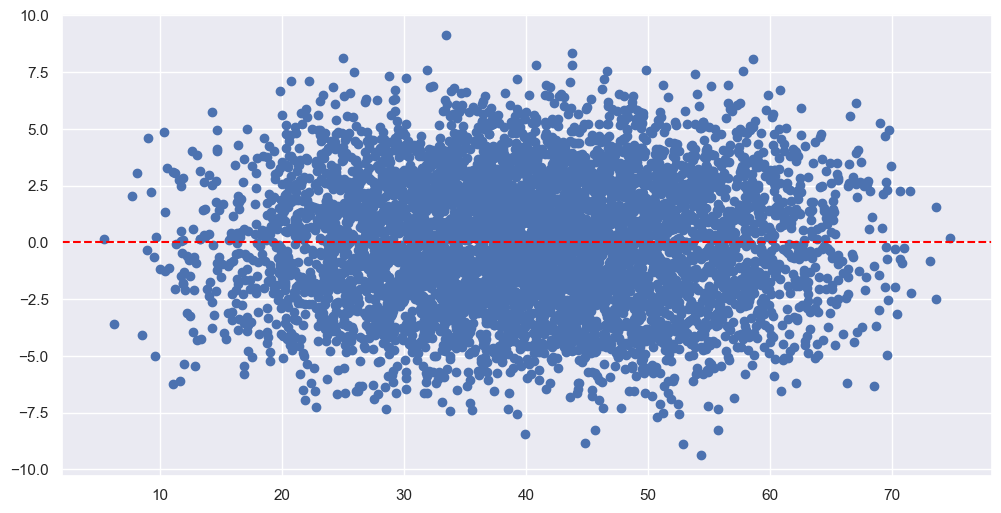

In [106]:
plt.scatter(y_pred,residuals)
plt.axhline(0, color='red', linestyle='--')

- Based on visual inspection, the spread of error in the image appears to be reasonably equal (homoscedastic).

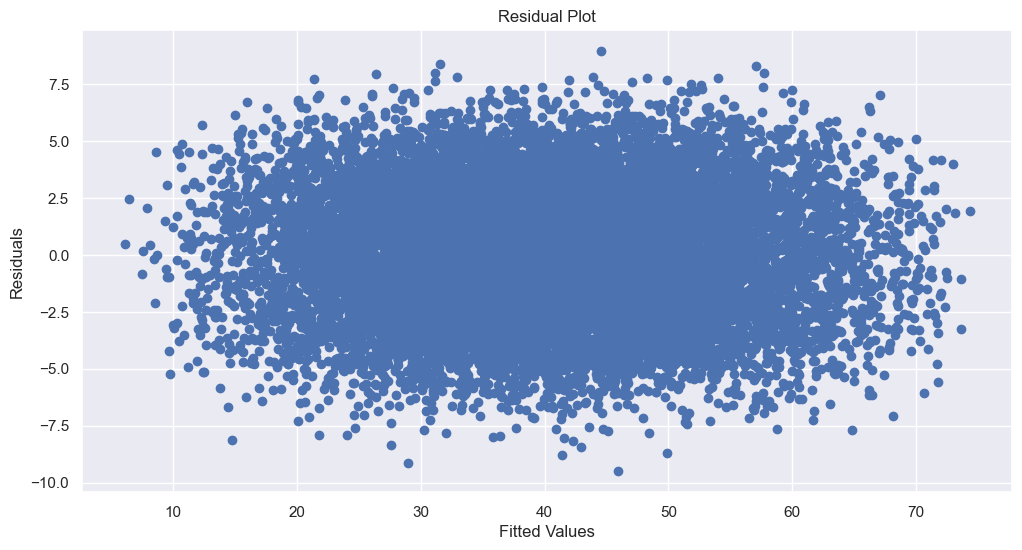

In [108]:
# Method-2 To Plot residuals and y_pred
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
 

plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 2. Breusch-Pagan Test (BP Test)
- Best for: Detecting heteroscedasticity in regression models.
- Null Hypothesis (H₀): Residuals are homoscedastic (constant variance).
- Alternative Hypothesis (H₁): Residuals are heteroscedastic (variance changes with predictors).

## Breusch-Pagan test

In [111]:
#import numpy as np
#import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model.resid

test_stat, p_value, _, _ = het_breuschpagan(residuals, sm.add_constant(X_train))
print(f"Breusch-Pagan p-value: {p_value}")

if p_value > 0.05:
    print("No significant heteroscedasticity detected /Homoscedasticity detected (fail to reject H₀).")
else:
    print("Heteroscedasticity detected (reject H₀).")


Breusch-Pagan p-value: 0.799422779847753
No significant heteroscedasticity detected /Homoscedasticity detected (fail to reject H₀).


### Insight : homoscedastic (constant variance), Passed 4th Assumption
- If the BP test p-value is high → Homoscedasticity ✅ (good for regression).
- If the BP test p-value is low → Linear heteroscedasticity ❌ (problematic for regression).

### 2. White’s Test
- Best for: Detecting both linear and non-linear forms of heteroscedasticity.

- Null Hypothesis (H₀): Homoscedasticity (constant variance).

- Alternative Hypothesis (H₁): Heteroscedasticity (non-constant variance).

## White's test

In [115]:
from statsmodels.stats.diagnostic import het_white
white_test_stat, white_p_value, _, _ = het_white(residuals, sm.add_constant(X_train))
print(f"White’s test p-value: {white_p_value}")

if white_p_value > 0.05:
    print("No significant heteroscedasticity detected (fail to reject H₀).")
else:
    print("Heteroscedasticity detected (reject H₀).")


White’s test p-value: 0.043010593998260606
Heteroscedasticity detected (reject H₀).


### For More Complex Cases: White’s test is more general, but might give a false positive.
- So we can not rely on the result of this test 

### **TEST No-4 Homoscedasticity Test passed: Go for Linear Regression ✅**
$ __________________________________________________________________________________________$ 


### Auto-Correlation:
**Autocorrelation checks whether residuals are independent or if there’s a pattern over observations. If residuals are correlated, the linear regression assumption of independent errors is violated.**

**When we plot our errors, the Spread of errors should be equal, having the same scatter(uniform)**

### For Simple Autocorrelation Detection: Use the Durbin-Watson test.
### For Time-Series Data: Use the ACF plot or Ljung-Box test for a broader assessment.
### For Higher-Order Autocorrelation: Use the Breusch-Godfrey test.

## Autocorrelation checks whether residuals are independent or if there’s a pattern over observations. If residuals are correlated, the linear regression assumption of independent errors is violated.

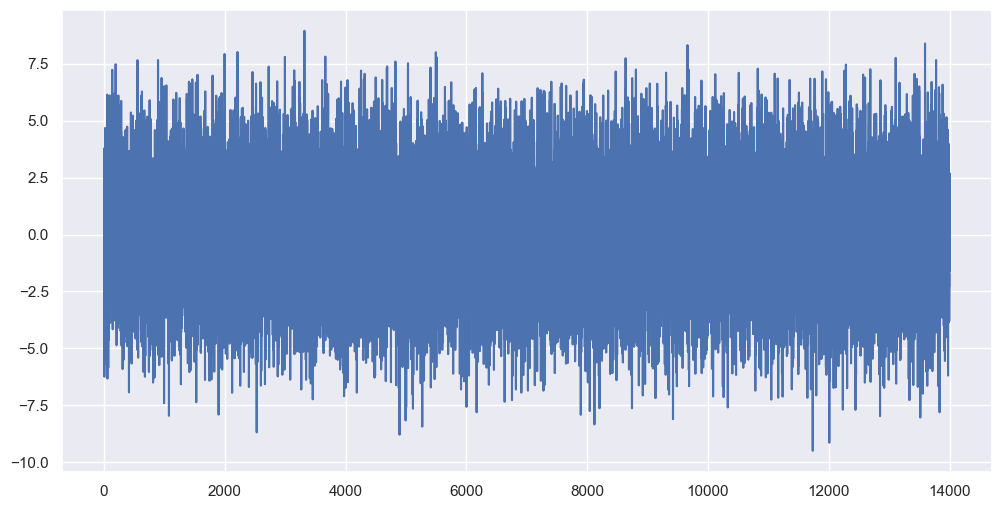

In [121]:
plt.plot(residuals)

### Durbin-Watson Test
- The Durbin-Watson (DW) test is the most common method for **detecting autocorrelation in residuals.**

- **DW ≈ 2 → No autocorrelation (Good for linear regression)**
- **DW < 1.5 → Positive autocorrelation (Problematic)**
- **DW > 2.5 → Negative autocorrelation (Problematic)**

In [124]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")


Durbin-Watson Statistic: 1.9772


- No **autocorrelation (Good for linear regression)**

**If DW ≈ 2 → No autocorrelation, linear assumption holds ✅**

**If DW < 1.5 (Positive Autocorrelation)**
     -  Residuals follow a trend over time (common in time-series data).
     -  Solution: Use ARIMA, GLS, or differencing techniques.
     
**If DW > 2.5 (Negative Autocorrelation)**
     -  Residuals alternate (zigzag pattern).
     -  Solution: Consider adding lagged variables or higher-order terms.

### Second Test:

**ACF (Autocorrelation Function) Plot**
- **The ACF plot visualizes the correlation of residuals with their own lagged values.**
- **If the residuals are independent, the autocorrelation values at different lags should hover around zero.**

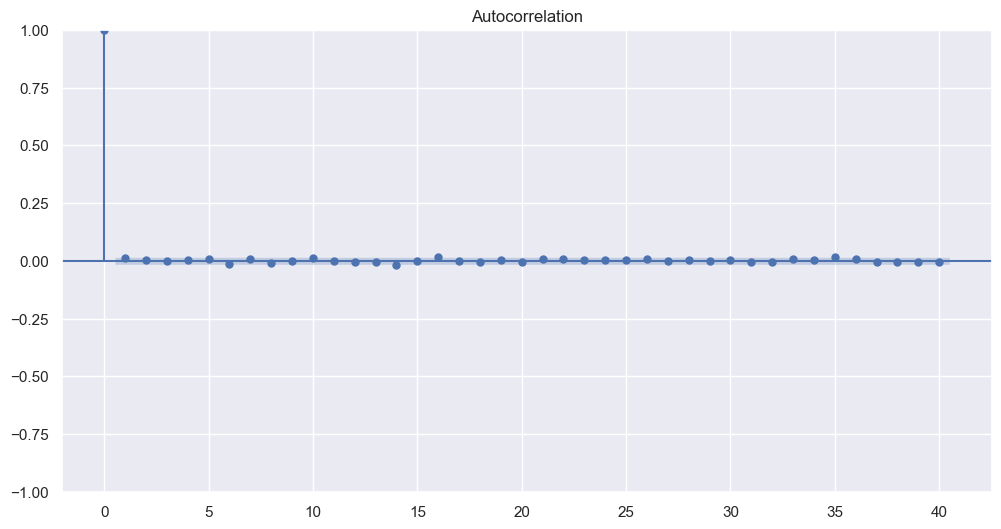

In [128]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of the residuals
plot_acf(model.resid, lags=40)  # Adjust lags as needed
plt.show()


### Insight: No Significantly spikes above or below zero, so no autocorrelation.

### **TEST No-5  Auto Co-relation of Residuals Test passed: Go for Linear Regression ✅**
$ __________________________________________________________________________________________$ 


In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 5)
(6000, 5)
(14000,)
(6000,)


In [132]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(14000, 5)
(6000, 5)


### Model Parameters

In [134]:
print(lm.intercept_)
print(lm.coef_)
#print(lm.pvalues) #'LinearRegression' object has no attribute 'pvalues'

1.913275001184239
[ 2.00648518  3.00377417  2.0089846   5.04906226 -0.02706414]


In [135]:
df.columns

Index(['Study Hours', 'Mental Health Score', 'Emotional Health Score',
       'Material to Study', 'Mentor Assigned', 'Python Score'],
      dtype='object')


**Study Hours**	2.0065	For every 1-hour increase in study hours, the dependent variable increases by 2.0065 units.

**Mental Health Score**	3.0038	A 1-unit increase in mental health score is associated with a 3.0038 unit increase in the dependent variable.

**Emotional Health Score**	2.0089	A 1-unit increase in emotional health score leads to a 2.0089 unit increase in the dependent variable.

**Material to Study**	5.0491	The choice of study material influences the dependent variable by 5.0491 units. (Check if this is a categorical variable—if yes, encoding type matters.)

**Mentor Assigned**	-0.0271	Having a mentor decreases the dependent variable by 0.0271 units. This effect is small and may not be statistically significant.

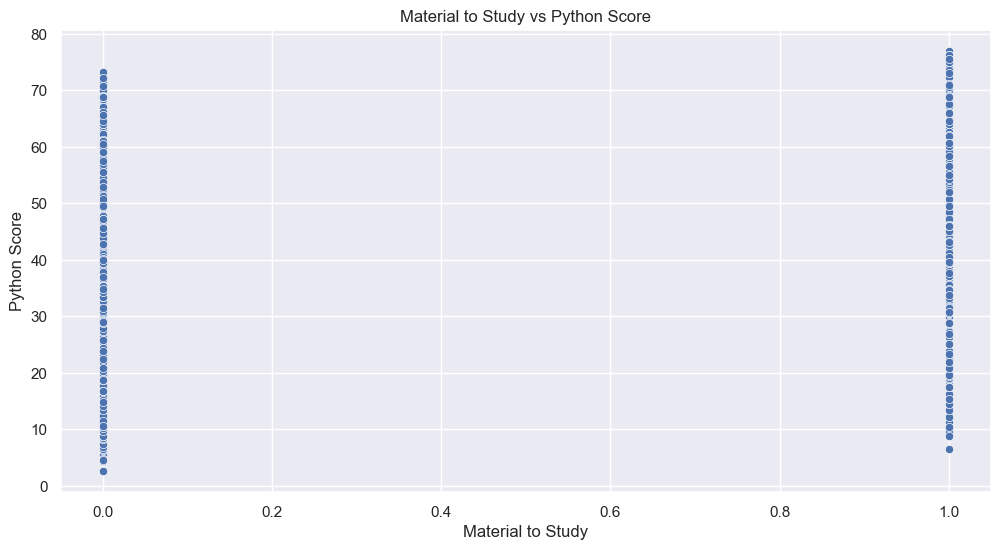

In [137]:
sns.scatterplot(x=df["Material to Study"], y=df["Python Score"])
plt.title("Material to Study vs Python Score")
plt.show()

In [138]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Study Hours,2.006485
Mental Health Score,3.003774
Emotional Health Score,2.008985
Material to Study,5.049062
Mentor Assigned,-0.027064


In [139]:
y_pred = lm.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [141]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100
r2_squared=r2_score(y_test, y_pred)

# Display Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"r2_squared Score: {r2_squared:.4f}")

Mean Absolute Error (MAE): 2.3435
Mean Squared Error (MSE): 8.0788
Root Mean Squared Error (RMSE): 2.8423
Mean Absolute Percentage Error (MAPE): 6.59%
r2_squared Score: 0.9451


### Metric	Value	Interpretation

**Mean Absolute Error (MAE)	2.3435	On average, predictions are 2.34 points away from actual values**

**Squared Error (MSE)	8.0788	Squared error metric (sensitive to large errors**

**Root Mean Squared Error (RMSE)	2.8423	Typical prediction error is 2.84 points, which is close to MAE**

**Mean Absolute Percentage Error (MAPE)	6.59%	Model predictions deviate only 6.59% from actual values on average**

**R² Score (Coefficient of Determination)	0.9451	94.51% of the variance in the target variable is explained by the model (Excellent Fit)**

In [143]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
evs

0.945086904308697

**EVS = 1 → Perfect model, explains all variance**

**EVS = 0 → Model explains no variance, just like predicting the mean**

**EVS < 0 → Model is worse than just predicting the mean**

In [145]:
n=X_test.shape[0]
p=X_test.shape[1]

adj_r2=1-(1-r2_squared)*(n-1)/(n-p-1)
adj_r2*100

94.504098181408

In [146]:
df.columns

Index(['Study Hours', 'Mental Health Score', 'Emotional Health Score',
       'Material to Study', 'Mentor Assigned', 'Python Score'],
      dtype='object')

<Axes: >

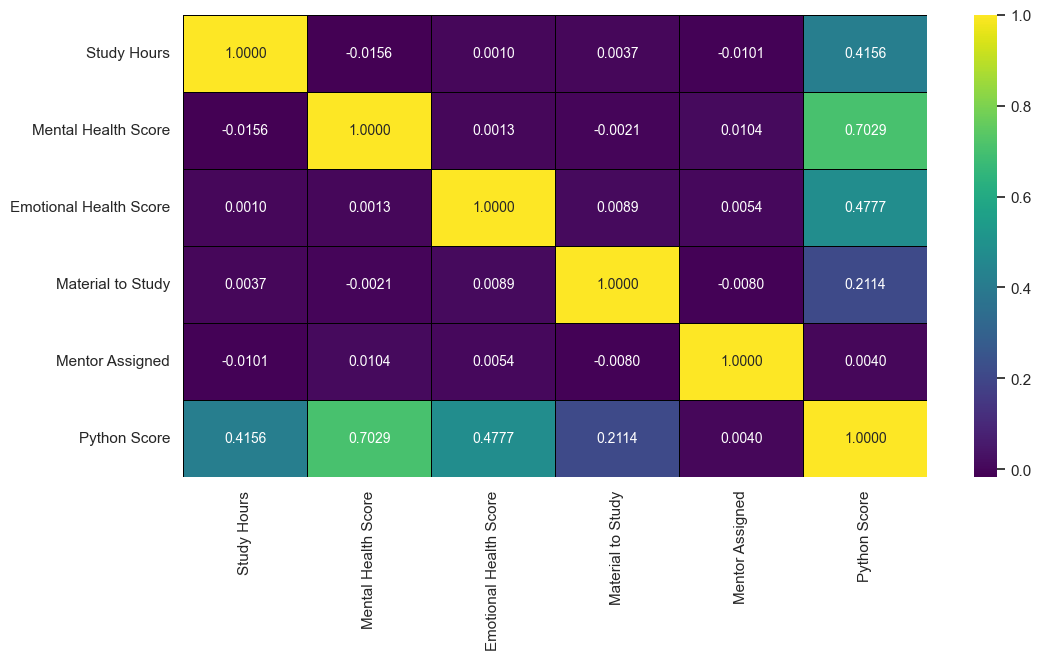

In [147]:
sns.heatmap(df.corr(),   #df.iloc[:,0:5]
            annot=True, 
            cmap="viridis",  # Change color map
            linewidths=0.5,  # Add spacing
            linecolor='black',  # Grid color
            fmt=".4f",  # Limit decimal places
            annot_kws={"size": 10})  # Control font size

In [148]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

         Actual  Predicted
0     34.745074  33.270794
1     31.127505  30.354839
2     50.833514  47.171778
3     43.521893  41.781979
4     53.149708  52.539657
...         ...        ...
5995  35.191014  33.392710
5996  46.174562  43.649336
5997  24.008458  27.590599
5998  24.019298  21.911170
5999  49.566560  50.552497

[6000 rows x 2 columns]


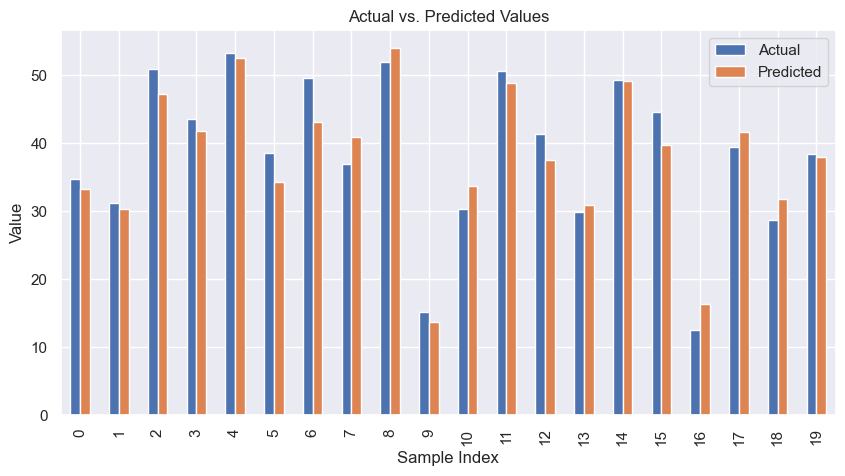

In [149]:
import matplotlib.pyplot as plt

comparison_df[:20].plot(kind='bar', figsize=(10, 5))  # Limiting to 20 samples for clarity
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend(["Actual", "Predicted"])
plt.show()

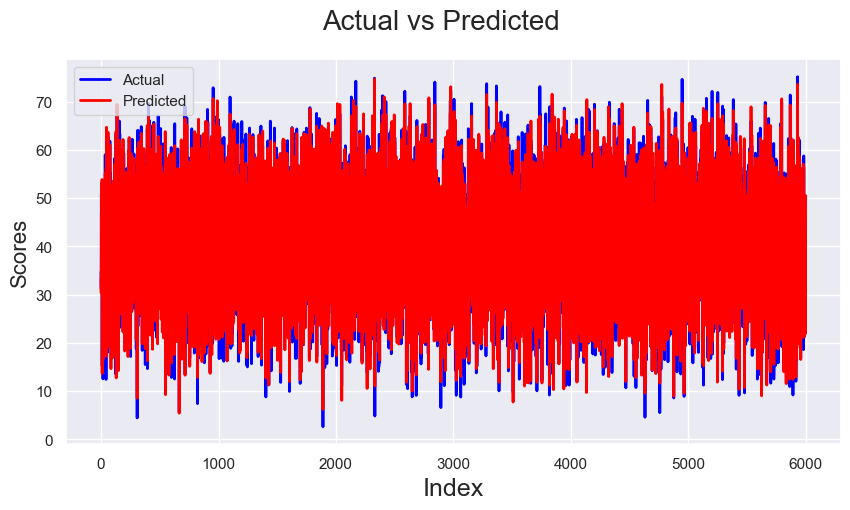

In [150]:
# Ensure the x-axis index matches the length of y_test
c = [i for i in range(len(y_test))]  

fig = plt.figure(figsize=(10, 5))
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label="Predicted")

fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Scores', fontsize=16)
plt.legend()
plt.show()

Text(0, 0.5, 'ytest-ypred')

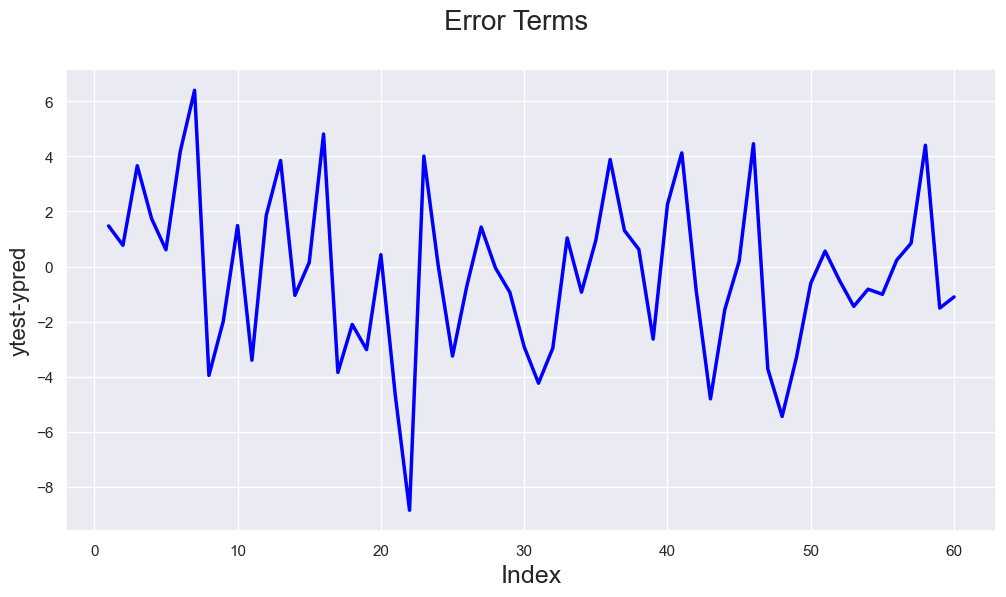

In [151]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test[:60]-y_pred[:60], color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

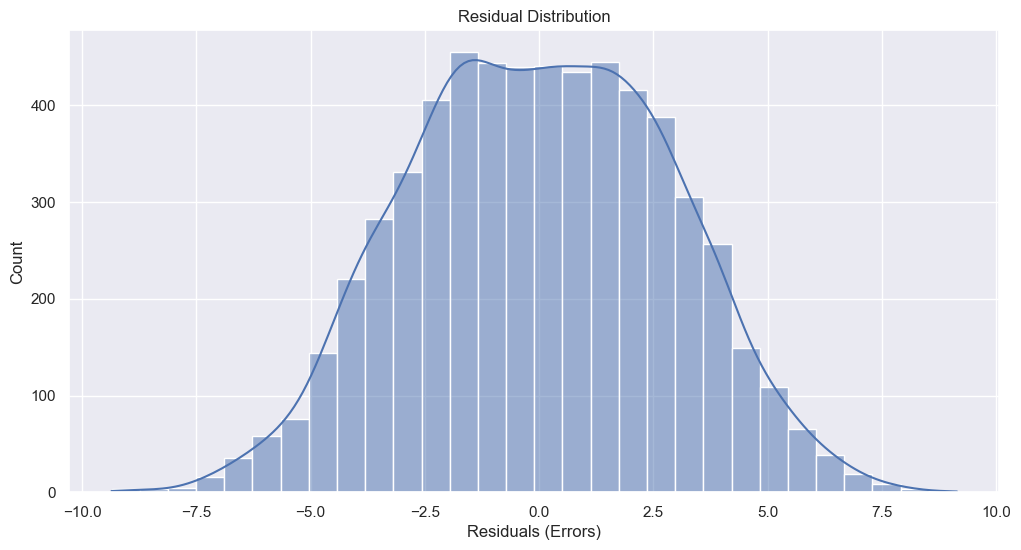

In [152]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)  # kde=True adds a smooth curve
plt.xlabel("Residuals (Errors)")
plt.title("Residual Distribution")
plt.show()

In [ ]:
"""Linear Regression ✅ (High Interpretability)

Scenario: Predicting student scores based on study hours.

Model equation:
Score=20+5×StudyHours
If a student studies 2 more hours, their score increases by 10 points.
You know exactly how each feature affects the prediction.
Easy to explain to teachers, students, or stakeholders.
High interpretability ✅ — You understand the relationship between variables.

Example 2 — XGBoost or Neural Networks ⚡ (Low Interpretability)
Scenario: Predicting student performance using many factors — study hours, sleep, nutrition, mental health, etc.
The model may give 95% accuracy but uses thousands of decision splits.
It’s hard to explain why a particular student got 75 marks instead of 85.
You know it predicts well, but not exactly why.
Low interpretability ❌ — You trust the model, but can’t explain it easily.


Key Insight 💡
If stakeholders need to trust and understand the model → choose highly interpretable models.
If accuracy matters more than explanation → go for complex models.

"""

In [ ]:
'''1. Local vs. Global Interpretability
Local Interpretability (SHAP provides this)
What it explains: Why the model made one specific prediction.
Example:
"This student scored 75 marks because:
+10 from study hours, +5 from sleep, −8 from nutrition."
SHAP tells you the contribution of features for one prediction at a time.
✅ Good for answering:
“Why did the model predict this particular result?

Global Interpretability (Model-level understanding)
What it explains: The overall behavior of the model — how it treats all features across the dataset.
Example:
“In general, study hours have the highest positive impact,
while nutrition has a moderate negative effect.”
To achieve this, you often use:
Feature importance plots
Partial dependence plots
Correlation analysis
Or simpler models like Linear Regression, which are inherently interpretable.
✅ Good for answering:
“How does the model behave in general
”'''

In [ ]:
'''
We check linear regression assumptions when we need global interpretability, because they ensure the model
behaves as expected across the entire dataset.
For complex models, we often lose that transparency, so we use SHAP to achieve local interpretability,
explaining why a specific prediction was made.”
'''